<a href="https://colab.research.google.com/github/Cctamin/Project_Section1/blob/master/n211a_simple_regression_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [ ]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
import pandas as pd

df_corr = df.corr()
corr_price = pd.DataFrame(abs(df_corr['price'])).drop(['price'])

In [ ]:
corr_price.idxmax()

price    sqft_living
dtype: object

sqft_living과 pince간의 양의 상관관계가 가장 큼.

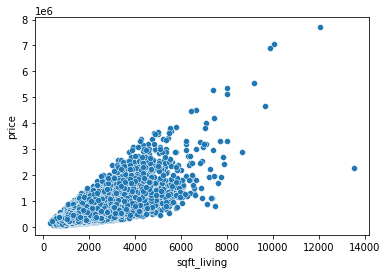

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, y='price', x='sqft_living')

### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

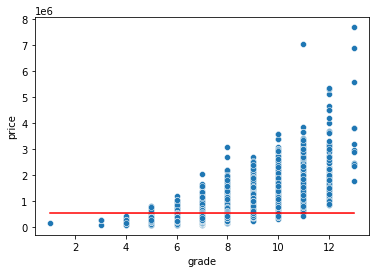

In [ ]:
x = df['grade']
y = df['price']
predict = df['price'].mean()

sns.scatterplot(data = df, y = y, x = x)
sns.lineplot(y = predict, x = x, color='red')

### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

feature = ['grade']
target = 'price'
X_train = df[feature]
y_train = df[target]

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_test = [[6]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} grade를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

6 grade를 가지는 주택의 예상 가격은 $194700 입니다.


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [ ]:
# 회귀 계수
model.coef_

array([208457.56245838])

In [ ]:
# 회귀 절편
model.intercept_

-1056044.9770097742

In [ ]:
from ipywidgets import interact

@interact
def explain_prediction(grade=(1,13)):
    y_pred = model.predict([[grade]])
    pred = f"{int(grade)} grade 주택 가격 예측: ${int(y_pred[0])} (1 grade당 추가금: ${int(model.coef_[0])})"

    return pred

interactive(children=(IntSlider(value=7, description='grade', max=13, min=1), Output()), _dom_classes=('widget…

### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [ ]:
feature = ['sqft_living']
target = 'price'
X_train = df[feature]
y_train = df[target]

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_test = [[x] for x in X_train['sqft_living']]
y_pred = model.predict(X_test)

In [ ]:
# 회귀 계수
print("회귀 계수 : ", model.coef_)

# 회귀 절편
print("회귀 절편 :", model.intercept_)

회귀 계수 :  [280.6235679]
회귀 절편 : -43580.74309447396


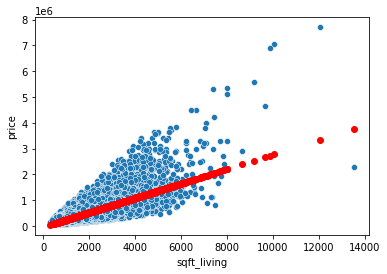

In [ ]:
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.scatter(X_test, y_pred, color = 'red')
plt.show()

## 🔥도전과제

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###